In [11]:
import pandas as pd
import seaborn as sns

In [2]:
teams = pd.read_csv('olympics.csv')

In [3]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [5]:
teams = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]

In [6]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [10]:
# checking which columns we can/should use to make predictions
teams.corr(numeric_only = True)['medals']

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


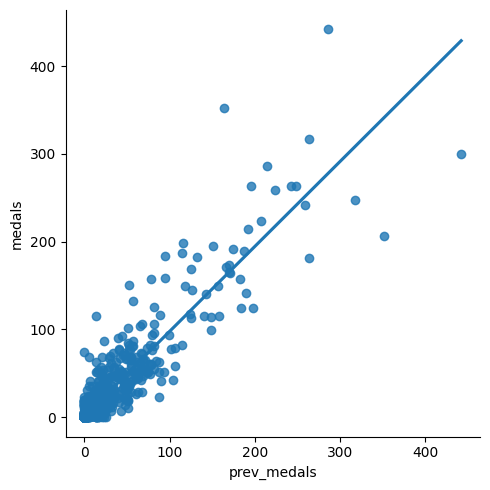

In [19]:
sns.lmplot(x = 'athletes', y = 'medals', data = teams, fit_reg = True, ci = None)

<Axes: ylabel='Frequency'>

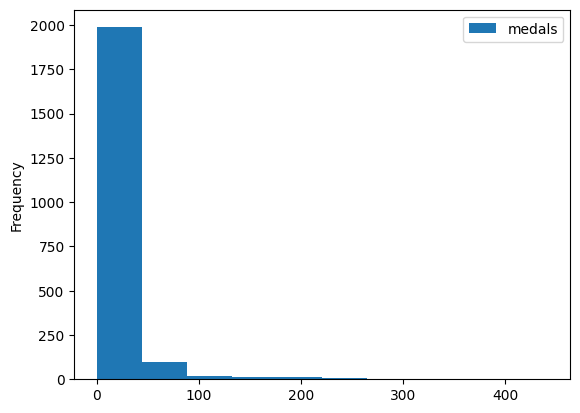

In [20]:
teams.plot.hist(y = 'medals')

In [23]:
print(teams.isna().sum())

# displaying rows with missing values
teams[teams.isna().any(axis = 1)]

team             0
country          0
year             0
athletes         0
age              0
prev_medals    130
medals           0
dtype: int64


,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [25]:
# since prev_medals has missing values but we're using it as one of the predictor variables, we drop the rows with missing values
teams.dropna(inplace = True)
teams.isna().sum()

,0
team,0
country,0
year,0
athletes,0
age,0
prev_medals,0
medals,0


Dividing the data into train and test sets
data of years before 2012 are used as training data, and after that used for test data - to respect recency


In [28]:
train = teams[teams['year'] < 2012].copy()
test = teams[teams['year'] >= 2012].copy()
print(train.shape, test.shape)
# the division is roughly 75-25, which is close to the default 80-20 split so we're good

(1609, 7) (405, 7)


In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # initializing an object of the ML model

In [30]:
predictors = ['athletes', 'prev_medals']
target = 'medals'

In [32]:
# training the model on the train dataset
reg.fit(train[predictors], train[target])

LinearRegression()

In [38]:
# making actual predictions on the test dataset
predictions = reg.predict(test[predictors])
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [43]:
# the predictions don't make sense, because:
# - there are some negative values, and countries cannot win negative number of medals, so it needs to be 0
# - there are fractions, and again countries cannot win a fraction of a medal, it needs to be whole numbers

# Model Correction
test['predictions'] = predictions
test.loc[test['predictions'] < 0, 'predictions'] = 0

test['predictions'] = test['predictions'].round()

In [44]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [45]:
# measuring the error
from sklearn.metrics import mean_absolute_error

# the following function takes 2 parameters - 1st is the actual value, vs the 2nd - the prediction that the model actually made
error = mean_absolute_error(test['medals'], test['predictions'])
error

3.2987654320987656

In [46]:
# to see if the error of the model is accepatable or not, we compare it with the standard deviation
# rule of thuumb is that the error should be less than the standard deviation, or something went wrong.
# in this case, error is ~3.3 adn std is 33.6, so it's a good number
teams.describe()['medals']

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


<Axes: ylabel='team'>

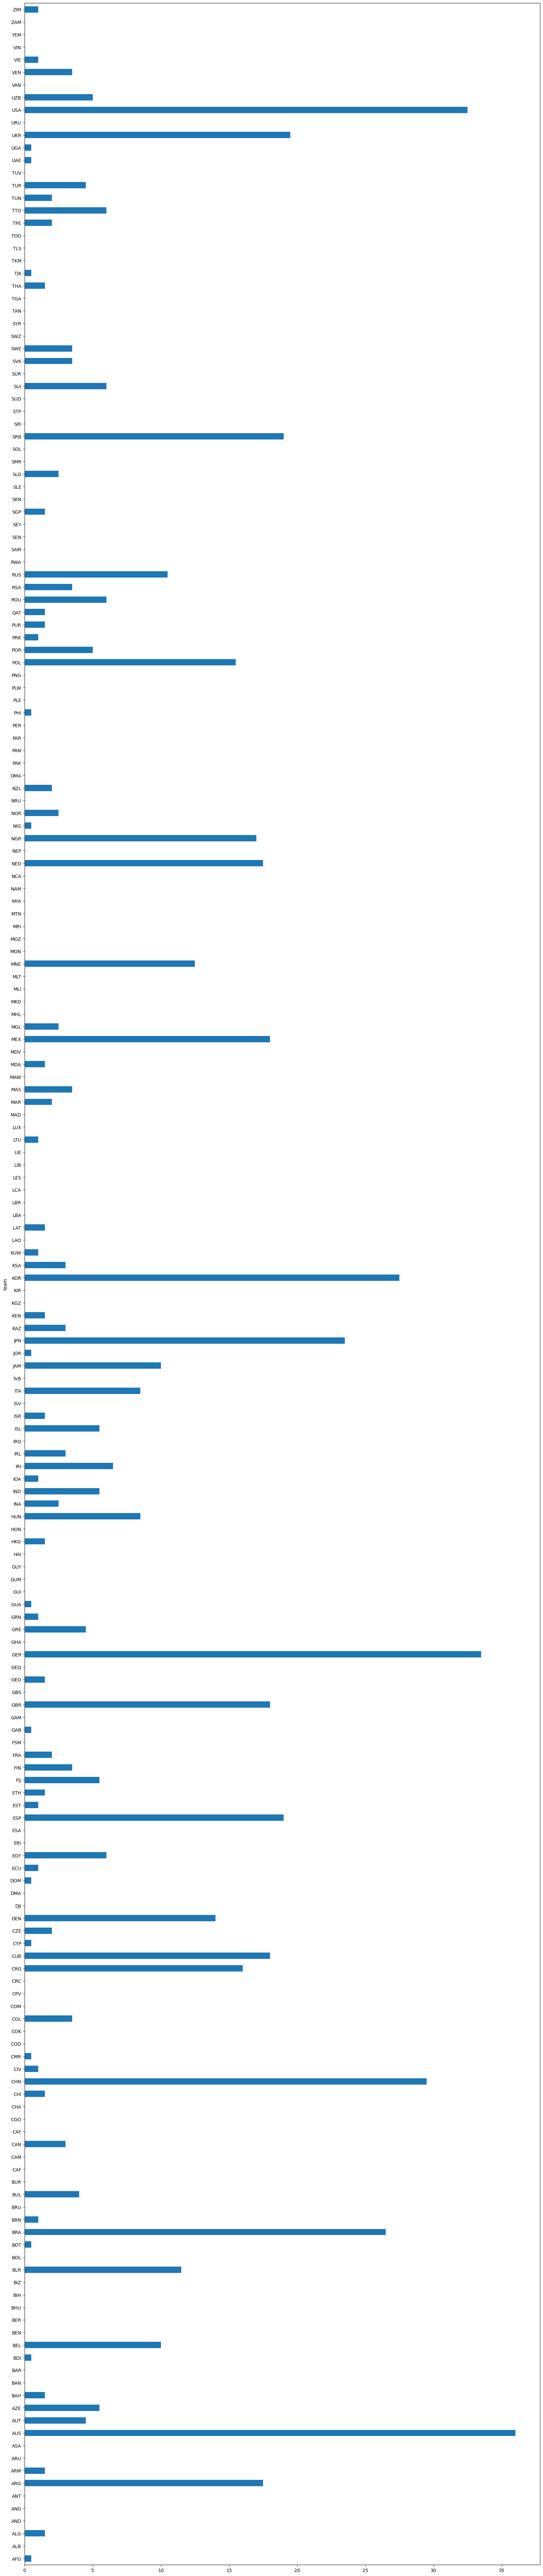

In [64]:
# calculating the absolute error - how much was the prediction off by the actual value
abs_error = (test['medals'] - test['predictions']).abs()

# additional thing to do is plot the average absolute error for each team, so we can conclusively say how accurate the model
# is for a particular team
abs_error_by_team = abs_error.groupby(test['team']).mean()
abs_error_by_team.plot(kind = 'barh', figsize=(20,100))